# Introduction to Data Science
## Homework 3 

Student Name: Akshay Prakash Tambe

Student Netid: apt321
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
# Import Packages
import pandas as pd

# Load Data into Pandas Dataframe
df = pd.read_csv("cell2cell_data.csv", header=None)

# Adding Headers to Data
df.columns = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", \
              "travel", "pcown", "creditcd", "retcalls", "churndep"]

# Using Pandas Sample Function for choosing random sample of items from an axis of object
# 80:20 Split
train_df = df.sample(frac=0.8)

# Dropping Data which is present in training_set
test_df = df.loc[~df.index.isin(train_df.index)]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
Random sampling in research reduces the potential for bias. Here, we have sampled the data randomly using `.sample()` from `Pandas` which generates a random sample of items from an axis of the object. To prove whether the data is randomly sampled on X, we can perform Randomness test which is one of the data evaluation technique used to analyze the distribution of a set of data by performing test for a sample selection bias and check whether it is random and unbiased sample. It will compare the calculated normal distribution of the sample with the actual distribution of the data. Statistical tests for normality are more precise since actual probabilities are calculated.  
<br>
The following listed are Statistical Hypothesis Testing which can be run to test the randomness of data:
<ul style="color:blue">
    <li>Normality Test / D’Agostino and Pearson’s Test:  Determines if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.</li>
    <li>Heckman Correction: A two-step statistical approach, offers a means of correcting for non-randomly selected samples.</li>
    <li>More Statistical Tests: Shapiro-Wilks test, Jarque-Bera test, and Kolmogorov-Smirnov test</li>
</ul>
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
# Import DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier

# Instantiating Classifier with criterion='entropy' -> the function to measure the quality of a split, “entropy” for the information gain
classifier = DecisionTreeClassifier(criterion='entropy')

# Target Variable
y = train_df[df.columns[11]]
# Training Set
X = train_df[df.columns[0:11]]

# Build a decision tree classifier from the training set (X, y)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

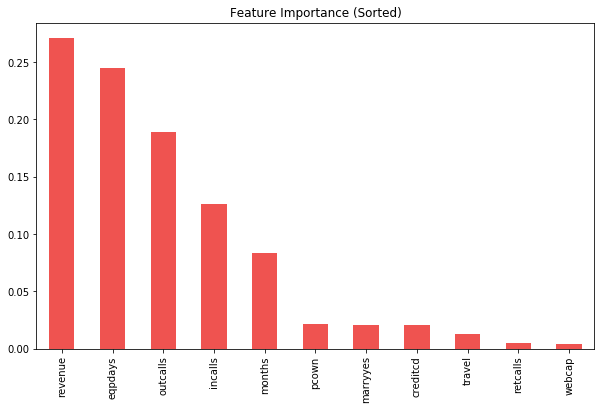

In [3]:
# Matplotlib for Plotting
import matplotlib.pyplot as plt

# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
feature_importance = classifier.feature_importances_

# Feature to be displayed (Sorted Importance Matrix)
importance_matrix = pd.Series(feature_importance, index=df.columns[:11]).sort_values(ascending=False)

# Show Bar Plot
importance_matrix.plot.bar(title="Feature Importance (Sorted)", color="#ef5350", figsize=(10, 6))
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

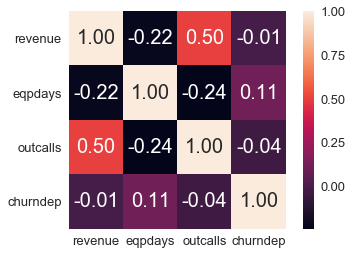

In [4]:
# Top 3 Important Features: revenue, eqpdays, outcalls
import seaborn as sns
import numpy as np

top_features = ['revenue', 'eqpdays', 'outcalls', 'churndep']
corelation_matrix = np.corrcoef(df[top_features].values.T)
sns.set(font_scale=1.3)
heatmap = sns.heatmap(corelation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, \
                      yticklabels=top_features, xticklabels=top_features)
plt.show()

<p>
<span style="color:blue">
A correlation matrix helps to show if the features are positively or negatively correlated.  
From the observations we can say that:  
<ul style="color:blue">
    <li>
        The relationship between `revenue` and `eqpdays` is negative `(-0.22)`: Customers who own older equipment are contributing less towards the revenue.
    </li>
    <li>
        The relationship between `revenue` and `outcalls` is positive `(+0.50)`: Customers that are making more outgoing calls contribute more to the revenue.
    </li>
    <li>
        The relationship between `eqpdays` and `outcalls` is negative `(-0.24)`: Customers who own older equipment are making less outgoing calls as compared to customers with new equipment.
    </li>
</ul>
</span>
<span style="color:blue">
Relating the above factors with the target variable `churndep`, we can say that:
<ul style="color:blue">
    <li>More the number of outcalls the user makes, the more revenue is generated by the company and it is less likely that the customer will churn. Also, from the relationship between `eqpdays` and `outcalls`, we can imply that the customer who owns the equipment which is less used, will make a higher number of outgoing calls and will be satisfied with the service.
    </li>
    <li>
    The older the equipment, the lesser would be the outgoing calls resulting in less revenue of the company and the more likely it is that the customer will churn. We can imply this as the old the equipment gets, the more technical problems it will have that will impact the service.
    </li>
</ul>
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [5]:
# Accuracy classification score
from sklearn.metrics import accuracy_score

# Splitting Target Variable from Test Data Set
test_data = test_df.T[:11].T
test_data_target = test_df.churndep

# Predict class for training and test data (X -> Training Set used earlier)
train_target_predict = classifier.predict(X)
test_target_predict = classifier.predict(test_data)

# Calculating Accuracy Scores for training and testing dataset
train_accuracy = accuracy_score(y, train_target_predict)
test_accuracy = accuracy_score(test_data_target, test_target_predict)
print("Accuracy on training dataset = ", train_accuracy*100)
print("Accuracy on testing dataset = ", test_accuracy*100)

Accuracy on training dataset =  99.987455703
Accuracy on testing dataset =  53.5499247366


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [6]:
# min_samples_split represents the minimum number of samples required to split an internal node. 
min_samples_split = [i*80 for i in range(2,12)]

# min_samples_leaf is The minimum number of samples required to be at a leaf node. 
min_samples_leaf = [i*40 for i in range(1,11)]

print("min_samples_split values:", min_samples_split)
print("min_samples_leaf values:", min_samples_leaf)

min_samples_split values: [160, 240, 320, 400, 480, 560, 640, 720, 800, 880]
min_samples_leaf values: [40, 80, 120, 160, 200, 240, 280, 320, 360, 400]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
`min_samples_split` is a minimum number of samples (or observations) which are required in a node to be considered for splitting. The default option may result in over-fitting and hence, we should consider more `min_samples_split` values. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Also, too high values can lead to under-fitting and therefore, I considered the values by looking at the size of the training dataset (31,887 observations). By considering the dataset, it should have at least 10 splits for learning, and hence, I considered a range till 3000. Furthermore, to narrow down the 10 values of the split, I fitted the model with this tuning parameter for accuracy scores and found the best possible combinations which are narrowed down my splits with a range till 1000.  
<br>
`min_samples_leaf` defines the minimum samples (or observations) required in a terminal node or leaf. It is used to control over-fitting similar to `min_samples_split`. Generally, lower values should be chosen because the regions in which the minority class will be in majority will be very small. Therefore, I considered the range of values till 500 by cross-validating with considerable accuracy scores with less suspicion of over-fitting.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_leaf` as the x-axis and generate a new series (line) for each of `min_samples_split`.

(5 Points)

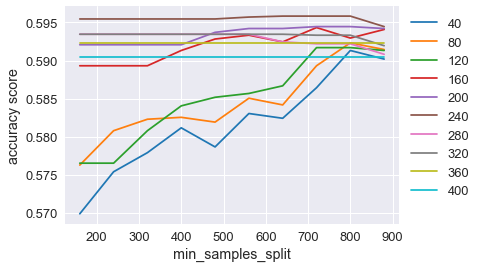

Best accuracy score achieved from tuning parameters = 59.5835423984
Best Configuration of Tuning Parameters: min_samples_split = 640 and min_samples_leaf = 240


In [7]:
# Determining best accuracy by tuning parameters
best_accuracy_score = 0

# Color Palette for Plotting
palette = plt.get_cmap('tab10')
plot_num = 0

for leaf in min_samples_leaf:
    test_accuracy_score = []
    
    for split in min_samples_split:    
        # Defining Classifier with tuning parameters
        classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = split, min_samples_leaf = leaf)
        
        # Build a decision tree classifier from the training set (X, y)
        classifier.fit(X, y)
        
        # Predict class for test data
        test_target_predict = classifier.predict(test_data)
        
        # Calculating Accuracy Scores on Test Dataset
        score = accuracy_score(test_data_target, test_target_predict)
        
        # Storing Scores in a list
        test_accuracy_score.append(score)
        
        # Getting best accuracy score, min_samples_split and min_samples_leaf from comparison
        if score > best_accuracy_score:
            best_accuracy_score = score
            best_min_samples_split = split
            best_min_samples_leaf = leaf
    
    # Plotting as per different tuning parameters
    plt.plot(min_samples_split, test_accuracy_score, label=leaf, color=palette(plot_num))
    plot_num = plot_num + 1

# Setting Labels and Legend for Plot
plt.xlabel("min_samples_split")
plt.ylabel("accuracy score")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

print("Best accuracy score achieved from tuning parameters = " + str(best_accuracy_score*100))
print("Best Configuration of Tuning Parameters: min_samples_split = " + str(best_min_samples_split) \
      + " and min_samples_leaf = " + str(best_min_samples_leaf))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
Best accuracy score achieved from tuning parameters is 59.58% with below configuration:
<ul style="color:blue">
    <li>min_samples_split = 640</li>
    <li>min_samples_leaf = 240</li>
</ul>
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
I would go for the churn prediction model to find the areas where the company lacks from the modeling results. We can find the most important features that are responsible for customers churning. Particularly with respect to the marketing department, I would focus on implications such as New Customer Attraction and Existing Customer Retention to improve the revenue of the company.  
<br>
In a real business environment, we can consider this dataset with a telecom industry. From this dataset, we can analyze why the company is losing their customers. From the model, we can extract factors that are affecting the service. After this, we can fix this factors by business strategies. For example, we found that relationship between `eqpdays` and `outcalls` is negative and here, we can introduce our customers with trade-in offers on discounted rate where they can swap their current equipment with the old one at a discounted price. This would improve the customer experience and hence, the revenue of the company. We can collect the live data of the service on a periodic basis and check if there are any business improvements happening.  
<br>
By finding such affecting factors, we can offer them new products, improved service, and offer customized perks and discount coupons which might hold the existing customer base. The churn prediction model helps us direct the resources in the areas where it is needed the most and it is beneficial. Consider a company, which doesn't have a churn prediction model, most of its resources would be put in areas on the assumption that they lead to customer churning. This model can be used Churn Prediction Model makes us understand the requirements of the customers better and in turn, increasing the business of the company.
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [9]:
# Importing Packages for converting variable "YEAR" into date-time format
from statsmodels.api import tsa

# Load Data into Pandas Dataframe
df = pd.read_csv("cases.csv")

# Convert "Year" into datetime format
df["YEAR"] = pd.Index(tsa.datetools.dates_from_range('1700', '2008'))

df

,YEAR,YFCASES
0,1700-12-31,5.0
1,1701-12-31,11.0
2,1702-12-31,16.0
3,1703-12-31,23.0
4,1704-12-31,36.0
5,1705-12-31,58.0
6,1706-12-31,29.0
7,1707-12-31,20.0
8,1708-12-31,10.0
9,1709-12-31,8.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

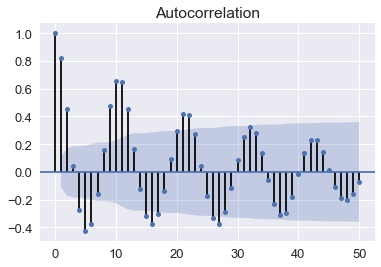

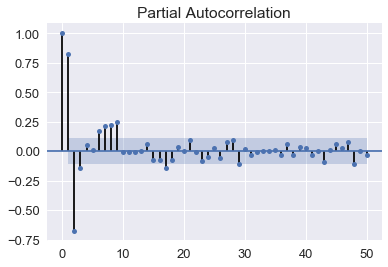

In [10]:
# Setting inline for plotting multiple plots in a single IPython Cell
%matplotlib inline
from pandas import Series
from matplotlib import pyplot

# Plotting Autocorrelation (Limiting the number of lags on the x-axis to 50 to make the plot easier to read)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.YFCASES, lags= 50)
pyplot.show()

# Plotting Partial autocorrelation (Limiting the number of lags on the x-axis to 50 to make the plot easier to read)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.YFCASES, lags= 50)
pyplot.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
Autocorrelation graph (ACF) shows a sine-wave shape pattern with regular positive and negative flow at regular intervals. The partial autocorrelation (PACF) plot shows spikes at lags 1 and 2 and no correlation for other lags.
<br>
So, from the observations of the above plots, `Rule 2` fits in according to the rules so we will choose the value of autoregressive (p) parameter = 2 and moving average (q) parameter = 0. This makes the model as ARMA(2,0) with two autoregressive terms and no moving averages as it verifies Rule 2 for the given dataset.
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [11]:
# Calculating the Durbin-Watson statistic
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
durbin_watson_stat = sm.stats.durbin_watson(df.YFCASES)
print("Durbin Watson Value = ", durbin_watson_stat)

Durbin Watson Value =  0.139528926599


<p>
<span style="color:blue">
As the Durbin Watson Value is less than 2, it indicates the presence of autocorrelation.  
This marks that the errors are correlated. Hence, DW Statistic matches with the observations from ACF and PCF plot results I observed.
</span>
</p>

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


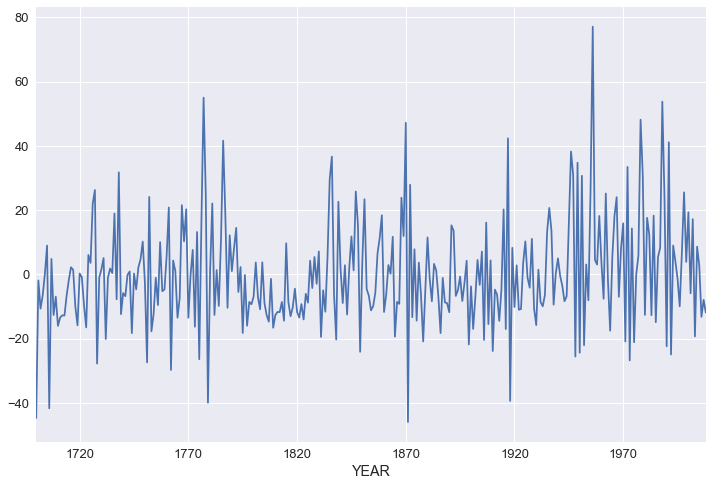

In [12]:
# Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

time_series = Series.from_csv('cases.csv', header=0, parse_dates=['YEAR'],index_col='YEAR')

model = ARMA(time_series, (2,0))
arima_modelfit = model.fit()

# Residuals are the difference between the observations and the fitted values
residuals = arima_modelfit.resid
residuals.plot(figsize=(12, 8))
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.736017448911497, pvalue=8.6524472974139354e-10)


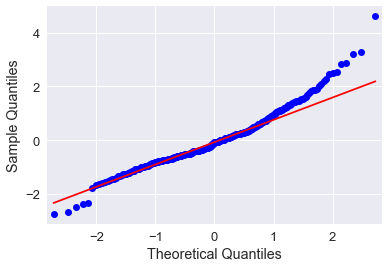

In [13]:
from scipy import stats
from statsmodels.graphics.api import qqplot

# Test whether a residuals differs from a normal distribution
print(stats.normaltest(residuals))

# Constructing qqplot
fig = qqplot(residuals, line='q', fit=True)
plt.show()

<p>
<span style="color:blue">
We performed a normality test to test whether the residuals come from a normal distribution. From the results of qq-plot, line follows a pattern much similar to line y=x but the values drift apart as they go on increasing.  
This verifies our hypothesis test that the the residuals do not come from a normal distribution. Also, the p-value indicates that the probability is negligible.  
Hence, from the observations, the results of qq-plot and hypothesis test do not align.
</span>
</p>

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


Durbin Watson Value =  2.14582698464


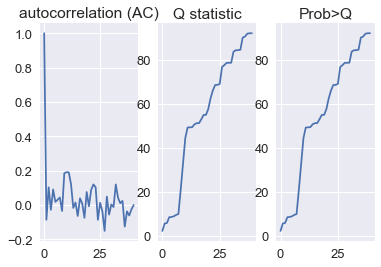

,autocorrelation AC,Q statistic,Prob(>Q)
lag,,,
1.0,-0.085220,2.265963,0.132244
2.0,0.103691,5.631595,0.059857
3.0,-0.027833,5.874879,0.117859
4.0,0.091122,8.491075,0.075158
5.0,0.019010,8.605309,0.125881
6.0,0.031321,8.916433,0.178333
7.0,0.044485,9.546129,0.215785
8.0,-0.034337,9.922561,0.270503
9.0,0.185690,20.967736,0.012794


In [14]:
from statsmodels.api import tsa
import numpy as np

print("Durbin Watson Value = ", durbin_watson(residuals))

acf, q, pvalue = tsa.acf(residuals.values.squeeze(), qstat=True)

# Plotting Values
plt.subplot(1, 3, 1)
plt.plot(acf)
plt.title('autocorrelation (AC)')
plt.subplot(1, 3, 2)
plt.plot(q)
plt.title('Q statistic')
plt.subplot(1, 3, 3)
plt.plot(q)
plt.title('Prob>Q')
plt.show()

# Showing Stats
stats = np.c_[range(1,41), acf[1:], q, pvalue]
calculations = pd.DataFrame(stats, columns=["lag", "autocorrelation AC", "Q statistic", "Prob(>Q)"])
calculations.set_index("lag")

<p>
<span style="color:blue">
<ul style="color:blue">
    <li>The autocorrelation of the ARMA(p,q) model has improved by verifying the Durbin-Watson Statistics.
    <li>The value is 2.15 which is closer to 2 and hence, indicates that the errors are uncorrelated and there is no presence of autocorrelation in the residual data.</li>
    <li>Also, the Q and p values also have improved from the previous observations.</li>
</ul>
</span>
</p>

8\. Compute prediction for years 2005-2008 and analyze their fit against actual values. (1 point)



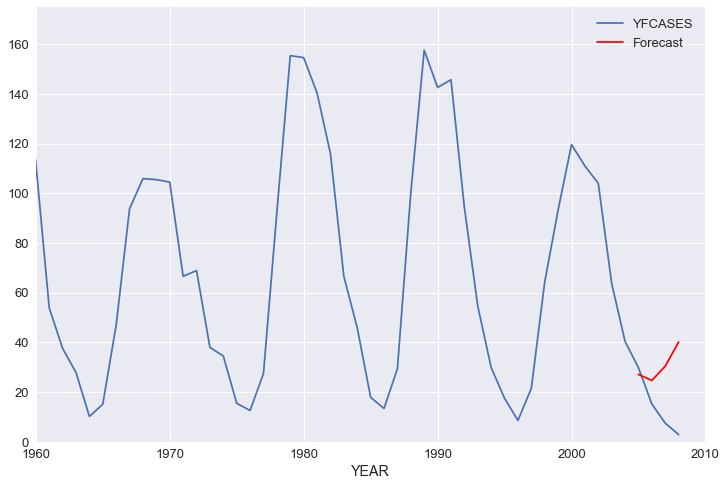

In [15]:
# Predictions from 2005-2008
predictions = arima_modelfit.predict('2005-01-01', '2008-01-01', dynamic=True)

# Actual Time Series Plot
comparison_plot = time_series.plot()

# Overlapping Predictions
comparison_plot = predictions.plot(ax=comparison_plot, style='r', label='Forecast', figsize=(12, 8));

comparison_plot.legend()
comparison_plot.axis((-10, 40, 0, 175))
plt.show()

<p>
<span style="color:blue">
The above graph is the fit of predicted values for year 2005 to 2008 and actual data set. This fit shows us that our prediction from the model varies from the actual data pattern.
</span>
</p>

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [16]:
mean_forecast_error = time_series.sub(predictions).mean()
mean_absolute_error = np.mean((np.abs(time_series.sub(predictions).mean()) / predictions))

print("Mean Forecast Error =", mean_forecast_error)
print("Mean Absolute Error =", mean_absolute_error)

Mean Forecast Error = -16.74783360306232
Mean Absolute Error = 0.5658464176301965
